In [1]:
!git clone https://github.com/KubaGwozdz/MetalStretchingClassification.git

Cloning into 'MetalStretchingClassification'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 17 (delta 6), reused 16 (delta 5), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [2]:
!pip install mahotas

     |████████████████████████████████| 5.7MB 17.9MB/s 


In [5]:
import pandas as pd
from data_loader import *
import seaborn as sns
from global_features_descriptors import get_features
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from VGG16 import VGG16CNN
from VGG19 import VGG19CNN
import cv2
SEED = 42

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data
We devided it into 2 categories:
* 1 high stretching Rm resistance
* 0 low stretching Rm resistance

In [7]:
df = load_data('/content/drive/My Drive/data')
df.head()

,filename,category,zoom
0,/content/drive/My Drive/data/lowRm/20_1_1_500x...,0,500
1,/content/drive/My Drive/data/lowRm/19_2_0_500x...,0,500
2,/content/drive/My Drive/data/lowRm/16_2_3_500x...,0,500
3,/content/drive/My Drive/data/lowRm/20_3_0_500x...,0,500
4,/content/drive/My Drive/data/lowRm/15_1_0_500x...,0,500


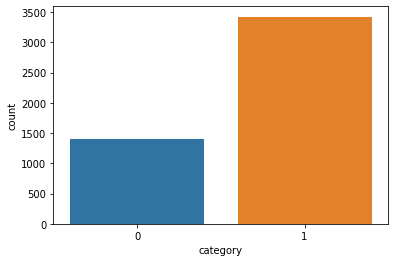

In [8]:
sns.countplot(x='category', data=df)

# Basic classificators

In [7]:
X, y = get_features(df)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, test_size=0.2)

In [9]:
num_trees = 100
models = []
names = []
models.append(('LR', LogisticRegression(random_state=SEED)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=SEED)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=SEED)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=SEED)))

In [10]:
scoring='accuracy'
accuracy = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=SEED)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    accuracy.append(cv_results)
    names.append(name)
    print(f'{name}: mean cv: {cv_results.mean()} std: {cv_results.std()}')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: mean cv: 0.738069443509858 std: 0.02346392008955086


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: mean cv: 0.7951281878743018 std: 0.017599172380985094


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: mean cv: 0.7302866563488326 std: 0.019433256358221074


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: mean cv: 0.7979732184913532 std: 0.02101197081972899


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: mean cv: 0.8651362627010295 std: 0.016190676272201752
NB: mean cv: 0.6869732857815759 std: 0.025761575119875254


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: mean cv: 0.7160251665433013 std: 0.015401105422804012


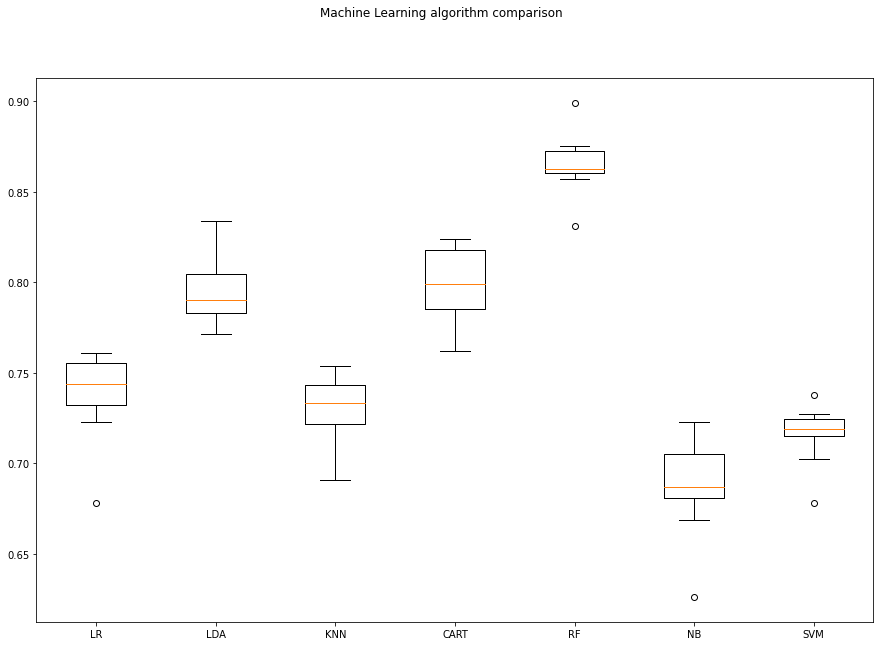

In [11]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot()
plt.boxplot(accuracy)
ax.set_xticklabels(names)
plt.show()

## Testing the best - RandomForest

In [12]:
clf = RandomForestClassifier(n_estimators=num_trees, random_state=SEED)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [13]:
rf_predictions = clf.predict(X_test)

In [14]:
print(f'''
Random Forest metrics:
      Accuracy: \t{accuracy_score(y_test, rf_predictions)}
      Precision: \t{precision_score(y_test, rf_predictions)}
      Recall: \t\t{recall_score(y_test, rf_predictions)}
      ''')


Random Forest metrics:
      Accuracy: 	0.8362694300518134
      Precision: 	0.8371161548731643
      Recall: 		0.9457013574660633
      


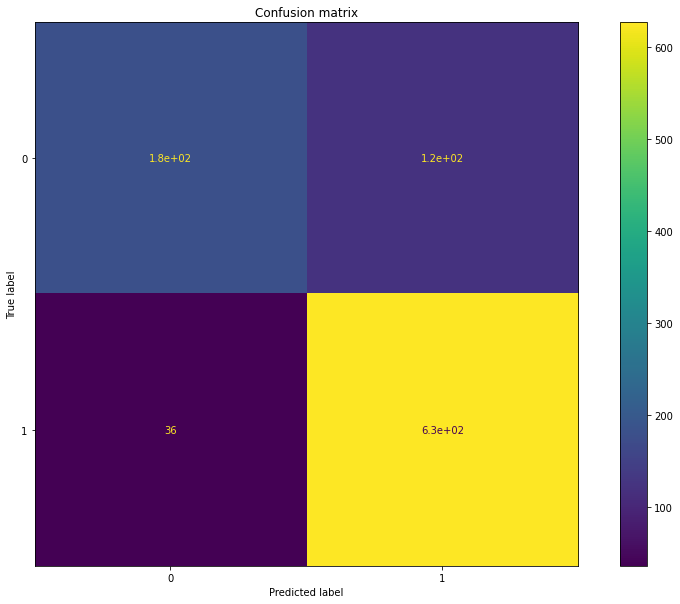

In [15]:
cm_fig = plt.figure(figsize=(15,10))
ax_cm_fig = cm_fig.add_subplot()
plot_confusion_matrix(clf, X_test, y_test, ax=ax_cm_fig)
ax_cm_fig.set_title('Confusion matrix')
plt.show()

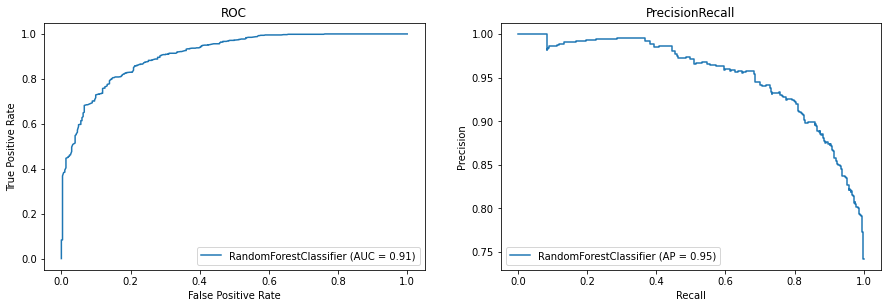

In [16]:
roc_pr_fig = plt.figure(figsize=(15,10))
ax_roc_fig = roc_pr_fig.add_subplot(221)
ax_roc_fig.set_title('ROC')
plot_roc_curve(clf, X_test, y_test, ax=ax_roc_fig)

ax_pr_fig = roc_pr_fig.add_subplot(222)
ax_pr_fig.set_title('PrecisionRecall')
plot_precision_recall_curve(clf, X_test, y_test, ax=ax_pr_fig)

plt.show()

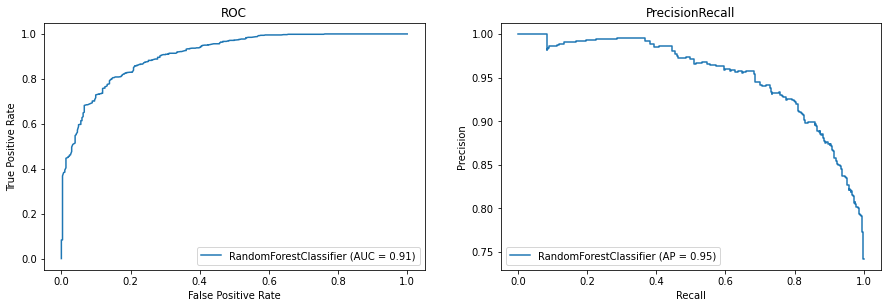

In [17]:
roc_pr_fig = plt.figure(figsize=(15,10))
ax_roc_fig = roc_pr_fig.add_subplot(221)
ax_roc_fig.set_title('ROC')
plot_roc_curve(clf, X_test, y_test, ax=ax_roc_fig)

ax_pr_fig = roc_pr_fig.add_subplot(222)
ax_pr_fig.set_title('PrecisionRecall')
plot_precision_recall_curve(clf, X_test, y_test, ax=ax_pr_fig)

plt.show()

## Testing the best - RandomForest

In [18]:
clf = RandomForestClassifier(n_estimators=num_trees, random_state=SEED)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
rf_predictions = clf.predict(X_test)

In [20]:
print(f'''
Random Forest metrics:
      Accuracy: \t{accuracy_score(y_test, rf_predictions)}
      Precision: \t{precision_score(y_test, rf_predictions)}
      Recall: \t\t{recall_score(y_test, rf_predictions)}
      ''')


Random Forest metrics:
      Accuracy: 	0.8362694300518134
      Precision: 	0.8371161548731643
      Recall: 		0.9457013574660633
      


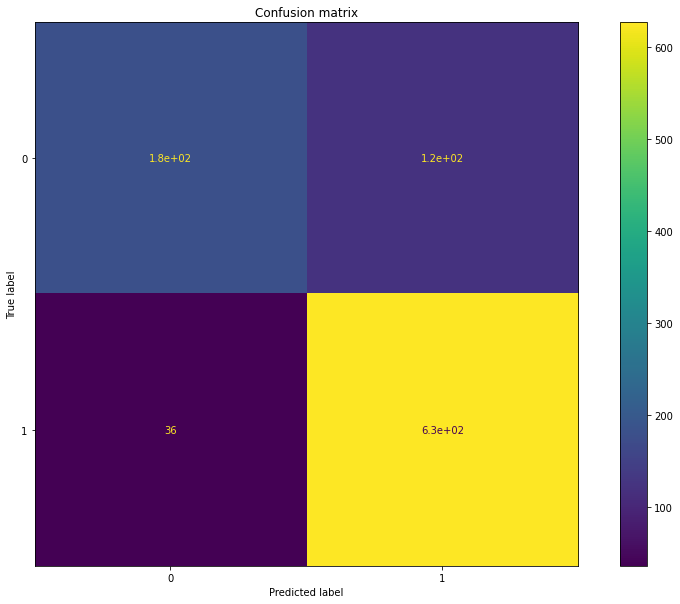

In [21]:
cm_fig = plt.figure(figsize=(15,10))
ax_cm_fig = cm_fig.add_subplot()
plot_confusion_matrix(clf, X_test, y_test, ax=ax_cm_fig)
ax_cm_fig.set_title('Confusion matrix')
plt.show()

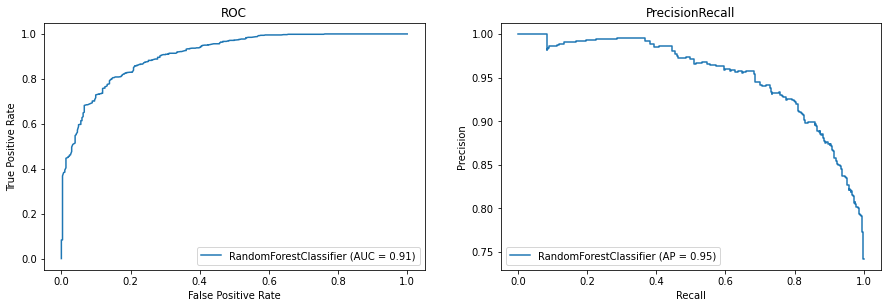

In [22]:
roc_pr_fig = plt.figure(figsize=(15,10))
ax_roc_fig = roc_pr_fig.add_subplot(221)
ax_roc_fig.set_title('ROC')
plot_roc_curve(clf, X_test, y_test, ax=ax_roc_fig)

ax_pr_fig = roc_pr_fig.add_subplot(222)
ax_pr_fig.set_title('PrecisionRecall')
plot_precision_recall_curve(clf, X_test, y_test, ax=ax_pr_fig)

plt.show()

### Images with wrong predictions

In [36]:
def get_index_of_list_elem(items, value):
  for i in range(len(items)):
    found = True
    for a,b in zip(items[i], value):
      if a != b:
        found = False
    if found:
      return i
  return -1

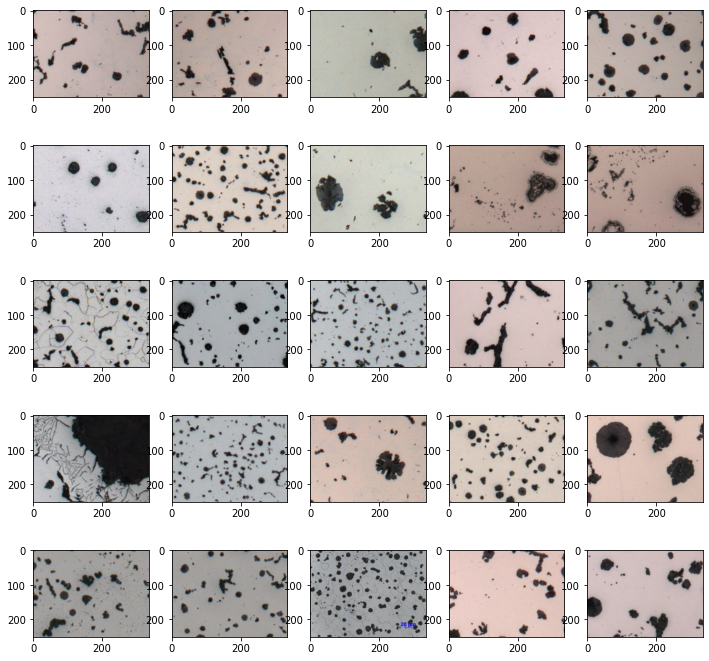

In [44]:
fig=plt.figure(figsize=(12, 12))
columns = 5
rows = 5

df_list = list(df['filename'])
j = 1

for i in range(len(X_test)):
  if rf_predictions[i] != y_test[i]:
    index = get_index_of_list_elem(X, X_test[i])
    if index != -1:
      image = cv2.imread(df['filename'][index])
      fig.add_subplot(rows, columns, j)
      plt.imshow(image)
      j += 1
    if j-1 == columns*rows:
      break
plt.show()

# Neural networks

In [9]:
X = []
y = []
for _, data in df.iterrows():
    img = cv2.imread(data.filename)
    X.append(img)
    y.append(data.category)
X = np.array(X)
y = np.array(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, test_size=0.2)

## VGG16

In [11]:
def images_wrong_pred(predictions):
  fig=plt.figure(figsize=(12, 12))
  columns = 5
  rows = 5

  for i in range(len(X_test)):
    if predictions[i] != y_test[i]:
      fig.add_subplot(rows, columns, i+1)
      plt.imshow(X_test[i])
      if i+1 == columns*rows:
        break
  plt.show()

In [47]:
vgg16 = VGG16CNN(image_size=X_train[0].shape, batch_size = 10, nb_epochs = 10)

In [48]:
vgg16.model_summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 253, 337, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 251, 335, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 253, 337, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 251, 335, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 167, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 127, 169, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 167, 128)     7

In [49]:
history = vgg16.train_model(X_train, y_train)

Epoch 1/10
386/386 [==============================] - 147s 370ms/step - loss: 97.0541 - accuracy: 0.6926
Epoch 2/10
386/386 [==============================] - 149s 386ms/step - loss: 0.6096 - accuracy: 0.7045
Epoch 3/10
386/386 [==============================] - 149s 385ms/step - loss: 0.5955 - accuracy: 0.7200
Epoch 4/10
386/386 [==============================] - 149s 385ms/step - loss: 0.5910 - accuracy: 0.7239
Epoch 5/10
386/386 [==============================] - 149s 385ms/step - loss: 0.6081 - accuracy: 0.7041
Epoch 6/10
386/386 [==============================] - 148s 385ms/step - loss: 0.5965 - accuracy: 0.7182
Epoch 7/10
386/386 [==============================] - 148s 385ms/step - loss: 0.5987 - accuracy: 0.7140
Epoch 8/10
386/386 [==============================] - 149s 385ms/step - loss: 0.5964 - accuracy: 0.7179
Epoch 9/10
386/386 [==============================] - 148s 385ms/step - loss: 0.5974 - accuracy: 0.7170
Epoch 10/10
386/386 [==============================] - 149s 385

In [51]:
score = vgg16.evaluate_model(X_test, y_test)

97/97 [==============================] - 10s 106ms/step - loss: 0.6215 - accuracy: 0.6870


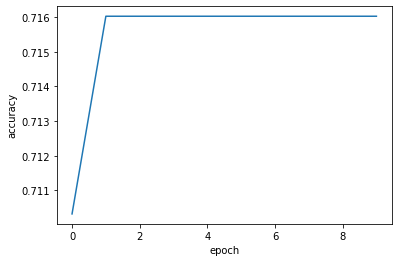

In [52]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

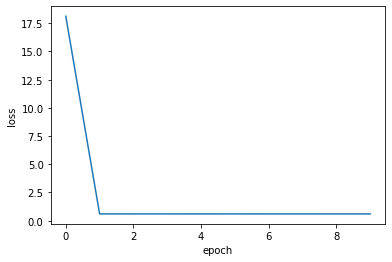

In [53]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [54]:
print('Evaluation\n')
print('   Loss:     ' + str(score[0]))
print('   Accuracy: ' + str(score[1]))

Evaluation

   Loss:     0.6214780211448669
   Accuracy: 0.6870466470718384


In [55]:
predictions_vgg16 = vgg16.predict(X_test)

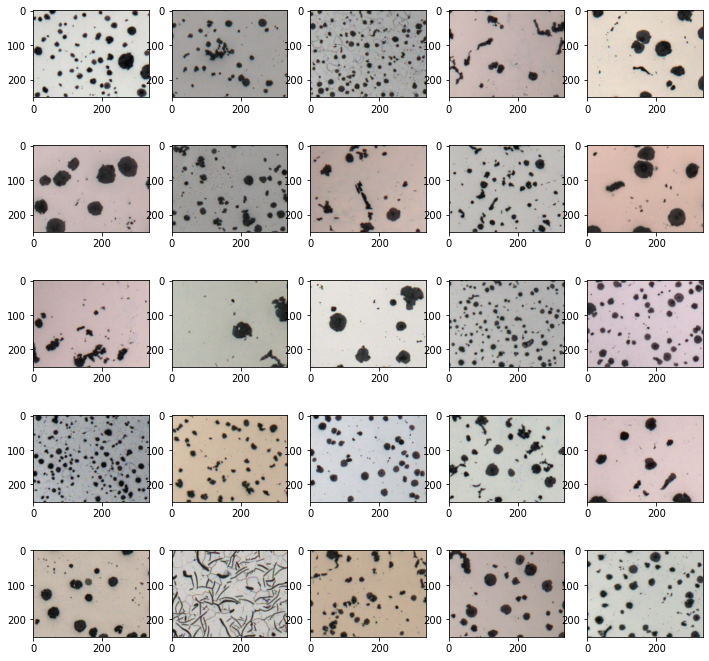

In [56]:
images_wrong_pred(predictions_vgg16)

## VGG19

In [12]:
vgg19 = VGG19CNN(X_train[0].shape, batch_size=10, nb_epochs=10)

80142336/80134624 [==============================] - 0s 0us/step


In [13]:
vgg19.model_summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 251, 335, 3)       0         
_________________________________________________________________
vgg19 (Functional)           (None, 7, 10, 512)        20024384  
_________________________________________________________________
flatten (Flatten)            (None, 35840)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               9175296   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [14]:
history_vgg19 = vgg19.train_model(X_train, y_train)

Epoch 1/10
386/386 [==============================] - 47s 101ms/step - loss: 0.9728 - accuracy: 0.7260
Epoch 2/10
386/386 [==============================] - 40s 104ms/step - loss: 0.4107 - accuracy: 0.8385
Epoch 3/10
386/386 [==============================] - 42s 110ms/step - loss: 0.3667 - accuracy: 0.8521
Epoch 4/10
386/386 [==============================] - 42s 108ms/step - loss: 0.3218 - accuracy: 0.8710
Epoch 5/10
386/386 [==============================] - 42s 109ms/step - loss: 0.2967 - accuracy: 0.8833
Epoch 6/10
386/386 [==============================] - 42s 109ms/step - loss: 0.2880 - accuracy: 0.8885
Epoch 7/10
386/386 [==============================] - 42s 109ms/step - loss: 0.2446 - accuracy: 0.9090
Epoch 8/10
386/386 [==============================] - 42s 109ms/step - loss: 0.2416 - accuracy: 0.8996
Epoch 9/10
386/386 [==============================] - 42s 109ms/step - loss: 0.2704 - accuracy: 0.8927
Epoch 10/10
386/386 [==============================] - 42s 109ms/step - l

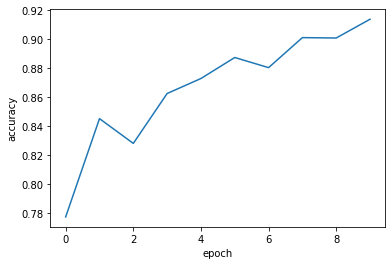

In [60]:
plt.plot(history_vgg19.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

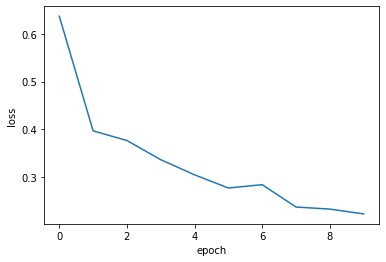

In [61]:
plt.plot(history_vgg19.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [62]:
score_vgg19 = vgg19.evaluate_model(X_test, y_test)

97/97 [==============================] - 12s 118ms/step - loss: 0.4373 - accuracy: 0.8746


In [63]:
print('Evaluation\n')
print('   Loss:     ' + str(score_vgg19[0]))
print('   Accuracy: ' + str(score_vgg19[1]))

Evaluation

   Loss:     0.4373297393321991
   Accuracy: 0.8746113777160645


In [64]:
predictions_vgg19 = vgg19.predict(X_test)

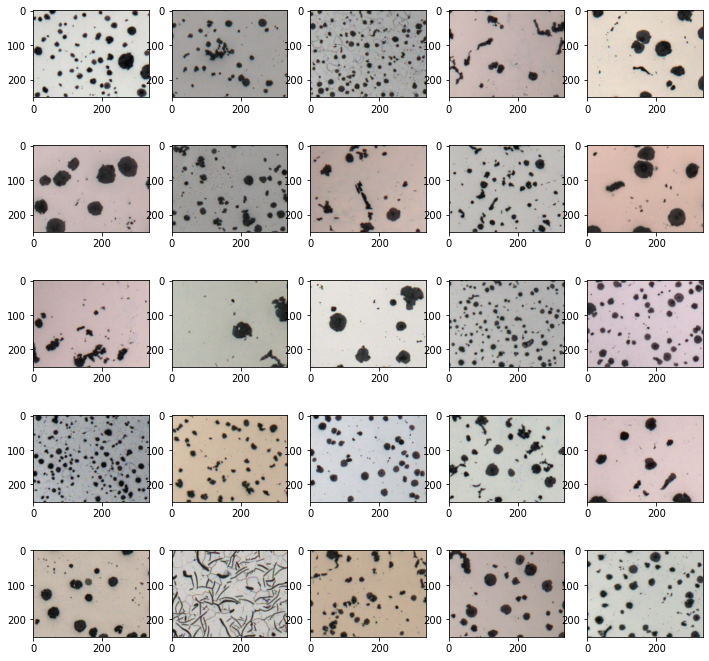

In [65]:
images_wrong_pred(predictions_vgg19)

## Finetuning VGG19

In [15]:
from keras.optimizers import Adam

vgg19.base_model.trainable = True
fine_tune_epochs=10
total_epochs =  10 + fine_tune_epochs
ft_learn_rate=0.0001
adam = Adam(learning_rate=ft_learn_rate)

vgg19.model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

history_vgg19_fine = vgg19.model.fit(X_train, y_train, batch_size=10,
                    epochs=total_epochs,
                    initial_epoch=history_vgg19.epoch[-1],
                    steps_per_epoch=len(X_train)/10,
                    verbose = 1)

Epoch 10/20
385/385 [==============================] - 44s 113ms/step - loss: 0.2060 - accuracy: 0.9066
Epoch 11/20
385/385 [==============================] - 42s 108ms/step - loss: 0.1349 - accuracy: 0.9405
Epoch 12/20
385/385 [==============================] - 42s 110ms/step - loss: 0.1211 - accuracy: 0.9394
Epoch 13/20
385/385 [==============================] - 42s 109ms/step - loss: 0.1179 - accuracy: 0.9416
Epoch 14/20
385/385 [==============================] - 42s 109ms/step - loss: 0.1162 - accuracy: 0.9399
Epoch 15/20
385/385 [==============================] - 42s 109ms/step - loss: 0.1038 - accuracy: 0.9459
Epoch 16/20
385/385 [==============================] - 42s 109ms/step - loss: 0.1028 - accuracy: 0.9488
Epoch 17/20
385/385 [==============================] - 42s 109ms/step - loss: 0.0996 - accuracy: 0.9439
Epoch 18/20
385/385 [==============================] - 42s 109ms/step - loss: 0.0929 - accuracy: 0.9424
Epoch 19/20
385/385 [==============================] - 42s 109ms

In [67]:
vgg19.model_summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 251, 335, 3)       0         
_________________________________________________________________
vgg19 (Functional)           (None, 7, 10, 512)        20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 35840)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               9175296   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

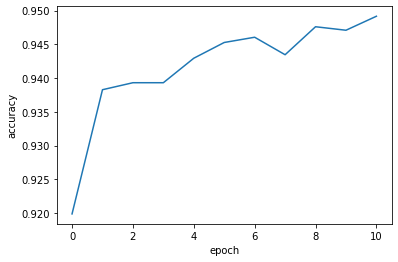

In [16]:
plt.plot(history_vgg19_fine.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

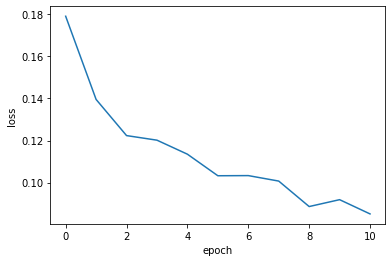

In [17]:
plt.plot(history_vgg19_fine.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [18]:
score_vgg19_fine = vgg19.evaluate_model(X_test, y_test)

97/97 [==============================] - 11s 113ms/step - loss: 0.6804 - accuracy: 0.8756


In [19]:
print('Evaluation\n')
print('   Loss:     ' + str(score_vgg19_fine[0]))
print('   Accuracy: ' + str(score_vgg19_fine[1]))

Evaluation

   Loss:     0.6804477572441101
   Accuracy: 0.8756476640701294


In [20]:
predictions_vgg19_fine = vgg19.predict(X_test)

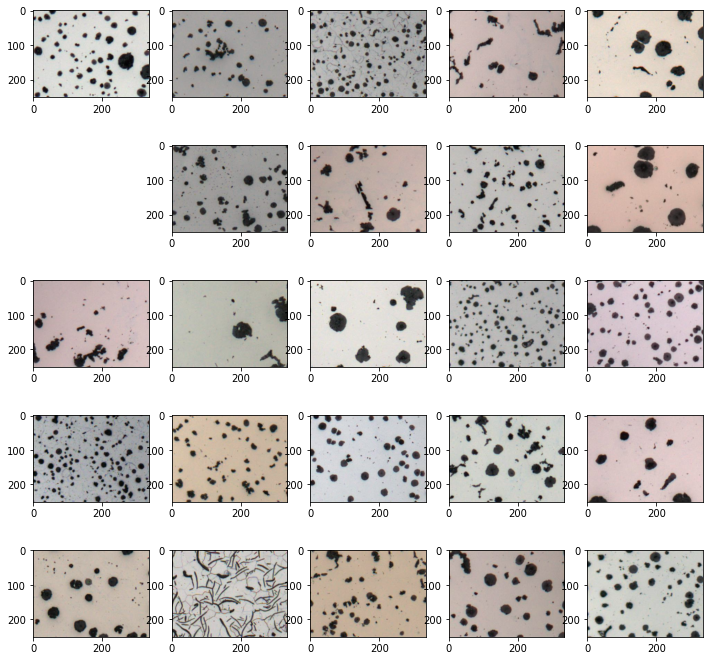

In [21]:
images_wrong_pred(predictions_vgg19_fine)